The aim of this project is to see whether we can predict whether a client subscribed to a term deposit after a direct marking campaign from a Portugese bank. 

The data is related with direct marketing campaigns of a Portuguese banking institution, based on phone calls (Moro, Cortez, and Rita 2014).

The goal of the campaigns were to get the clients to subscribe to a term deposit. There are 20 input variables and 1 binary output variable (y) that indicates whether the client subscribed to a term deposit with values ‘yes’,‘no’.

We try a few different classification methods, including: 
- Logistic Regression
- Random Forests
- K-Nearest Neighbours
- Support Vector Machines
- Neural Networks.


##Imports

In [ ]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

## Data Exploration & Wrangling


In [ ]:
#create a dataframe out of the csv file 
df = pd.read_csv('/content/bank-additional-full.csv')

In [ ]:
df.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [ ]:
print(df.columns.values)

['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"']


In [ ]:
print(list(df))

['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                        --------------  ----- 
 0   age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"  41188 non-null  object
dtypes: object(1)
memory usage: 321.9+ KB


In [ ]:
#split the first column into many columns, separated by semi-colons
df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y' ]] = df.iloc[:, 0].apply(lambda x: pd.Series(str(x).split(";")))
print(df)

      age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"  \
0      56;"housemaid";"married";"basic.4y";"no";"no";...                                                                                                                                                                             
1      57;"services";"married";"high.school";"unknown...                                                                                                                                                                             
2      37;"services";"married";"high.school";"no";"ye...                                                                                                                                                                             
3      40;"admin.";"married";"basic.6y";"no";"no";"no...                        

In [ ]:
df.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y""",age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";...",56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
1,"57;""services"";""married"";""high.school"";""unknown...",57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,"37;""services"";""married"";""high.school"";""no"";""ye...",37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no...",40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,"56;""services"";""married"";""high.school"";""no"";""no...",56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""


In [ ]:
#delete the first column
del df[df.columns[0]]
print(df)

      age            job    marital              education    default housing  \
0      56    "housemaid"  "married"             "basic.4y"       "no"    "no"   
1      57     "services"  "married"          "high.school"  "unknown"    "no"   
2      37     "services"  "married"          "high.school"       "no"   "yes"   
3      40       "admin."  "married"             "basic.6y"       "no"    "no"   
4      56     "services"  "married"          "high.school"       "no"    "no"   
...    ..            ...        ...                    ...        ...     ...   
41183  73      "retired"  "married"  "professional.course"       "no"   "yes"   
41184  46  "blue-collar"  "married"  "professional.course"       "no"    "no"   
41185  56      "retired"  "married"    "university.degree"       "no"   "yes"   
41186  44   "technician"  "married"  "professional.course"       "no"    "no"   
41187  74      "retired"  "married"  "professional.course"       "no"   "yes"   

        loan      contact  

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""


Great, now we have the dataframe in a workable state... let's check it out 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41188 non-null  object
 1   job             41188 non-null  object
 2   marital         41188 non-null  object
 3   education       41188 non-null  object
 4   default         41188 non-null  object
 5   housing         41188 non-null  object
 6   loan            41188 non-null  object
 7   contact         41188 non-null  object
 8   month           41188 non-null  object
 9   day_of_week     41188 non-null  object
 10  duration        41188 non-null  object
 11  campaign        41188 non-null  object
 12  pdays           41188 non-null  object
 13  previous        41188 non-null  object
 14  poutcome        41188 non-null  object
 15  emp.var.rate    41188 non-null  object
 16  cons.price.idx  41188 non-null  object
 17  cons.conf.idx   41188 non-null  object
 18  euribo

In [ ]:
print(df['emp.var.rate'].unique())

['1.1' '1.4' '-0.1' '-0.2' '-1.8' '-2.9' '-3.4' '-3' '-1.7' '-1.1']


In [ ]:
print(df['cons.price.idx'].unique())

['93.994' '94.465' '93.918' '93.444' '93.798' '93.2' '92.756' '92.843'
 '93.075' '92.893' '92.963' '92.469' '92.201' '92.379' '92.431' '92.649'
 '92.713' '93.369' '93.749' '93.876' '94.055' '94.215' '94.027' '94.199'
 '94.601' '94.767']


In [ ]:
print(df['campaign'].unique())

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '19' '18' '23'
 '14' '22' '25' '16' '17' '15' '20' '56' '39' '35' '42' '28' '26' '27'
 '32' '21' '24' '29' '31' '30' '41' '37' '40' '33' '34' '43']


In [ ]:
print(df['month'].unique())

['"may"' '"jun"' '"jul"' '"aug"' '"oct"' '"nov"' '"dec"' '"mar"' '"apr"'
 '"sep"']


In [ ]:
print(df['cons.conf.idx'].unique())

['-36.4' '-41.8' '-42.7' '-36.1' '-40.4' '-42' '-45.9' '-50' '-47.1'
 '-46.2' '-40.8' '-33.6' '-31.4' '-29.8' '-26.9' '-30.1' '-33' '-34.8'
 '-34.6' '-40' '-39.8' '-40.3' '-38.3' '-37.5' '-49.5' '-50.8']


In [ ]:
print(df['euribor3m'].unique())

['4.857' '4.856' '4.855' '4.859' '4.86' '4.858' '4.864' '4.865' '4.866'
 '4.967' '4.961' '4.959' '4.958' '4.96' '4.962' '4.955' '4.947' '4.956'
 '4.966' '4.963' '4.957' '4.968' '4.97' '4.965' '4.964' '5.045' '5'
 '4.936' '4.921' '4.918' '4.912' '4.827' '4.794' '4.76' '4.733' '4.7'
 '4.663' '4.592' '4.474' '4.406' '4.343' '4.286' '4.245' '4.223' '4.191'
 '4.153' '4.12' '4.076' '4.021' '3.901' '3.879' '3.853' '3.816' '3.743'
 '3.669' '3.563' '3.488' '3.428' '3.329' '3.282' '3.053' '1.811' '1.799'
 '1.778' '1.757' '1.726' '1.703' '1.687' '1.663' '1.65' '1.64' '1.629'
 '1.614' '1.602' '1.584' '1.574' '1.56' '1.556' '1.548' '1.538' '1.531'
 '1.52' '1.51' '1.498' '1.483' '1.479' '1.466' '1.453' '1.445' '1.435'
 '1.423' '1.415' '1.41' '1.405' '1.406' '1.4' '1.392' '1.384' '1.372'
 '1.365' '1.354' '1.344' '1.334' '1.327' '1.313' '1.299' '1.291' '1.281'
 '1.266' '1.25' '1.244' '1.259' '1.264' '1.27' '1.262' '1.26' '1.268'
 '1.286' '1.252' '1.235' '1.224' '1.215' '1.206' '1.099' '1.085' '1.072'


In [ ]:
print(df['nr.employed'].unique())

['5191' '5228.1' '5195.8' '5176.3' '5099.1' '5076.2' '5017.5' '5023.5'
 '5008.7' '4991.6' '4963.6']


In [ ]:
print(df['poutcome'].unique())

['"nonexistent"' '"failure"' '"success"']


In [ ]:
#convert age, duration, , to numeric columns
numerics = ["age","duration", 'pdays', 'euribor3m', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']
for col in numerics:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
#convert _job, marital, education,default, housing, loan, contact, month, day-of-week,_campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y__ columns to categorical 
columns = ["job","marital",'education', 'default','housing','loan','contact', 'month', 'day_of_week','poutcome', 'y']
for col in columns:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [ ]:
#Check for unique values in different columns
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [ ]:
#Check for null values in columns 
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No explicitly NaN values

In [ ]:
#see if null values were showing up as " " as opposed to "NaN"
df.replace(' ', np.nan, inplace=True)
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Nope 

In [ ]:
#check for duplicates 
sum(df.duplicated())



12

12 rows are complete duplicates 

In [ ]:
#Drop duplicates 
df.drop_duplicates(inplace=True)

In [ ]:
#Re check for duplicates 
sum(df.duplicated())


0

In [ ]:
#check to see whether the basic statistics make sense 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
# 0 values for 'previous' and 'pdays' could make sense... but maybe not 'duration column'.... check out 'duration' column 
df['duration'].describe()

count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

4918s max duraiton seems too high ... drop any row that has a duration more than 1 hour 

In [ ]:
#get the indexes of durations that are 
df[(df['duration'] > 3600)]['duration']

7727     3631
13820    3643
22192    4199
24091    4918
40537    3785
Name: duration, dtype: int64

In [ ]:
df = df.drop([7727, 13820, 22192, 24091, 40537])


##Visualize data 

Bar chart: 
- % of yes and no's per month 
- ages (binned) vs. % 'Yes' and 'no's per bin 
  (0-18) 
- average duration of 'Yes' and 'no' 
- average campaign vs Yes and No


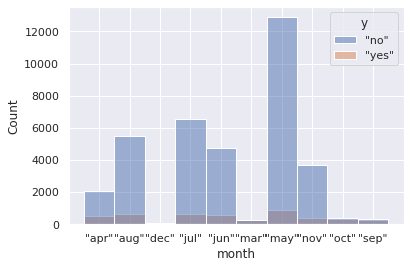

In [ ]:
#month vs. yes and no's 

sns.histplot(data=df,
            x=df['month'], 
             hue = df['y'])
            #y=df['y'])
            #hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, errcolor='.26', errwidth=None, capsize=None, dodge=True, ci='deprecated', ax=None, **kwargs)

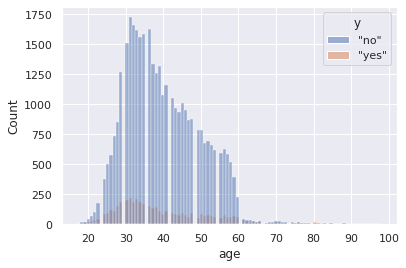

In [ ]:
#Age vs yes and no 
sns.histplot(data=df,
            x=df['age'], 
             hue = df['y'])
            #y=df['y'])
            #hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, errcolor='.26', errwidth=None, capsize=None, dodge=True, ci='deprecated', ax=None, **kwargs)

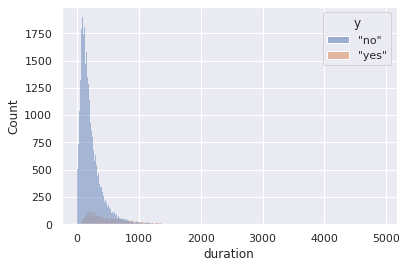

In [ ]:
#duration vs. yes and nos
sns.histplot(data=df,
            x=df['duration'], 
             hue = df['y'])
            #y=df['y'])
            #hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, errcolor='.26', errwidth=None, capsize=None, dodge=True, ci='deprecated', ax=None, **kwargs)

##One Hot Encode Categorical Variables

One hot encode some categorical variables: 
[["job","marital","education","default","housing","loan","contact,"month","day_of_week","poutcome"]]

In [ ]:
#categorical data
categorical_cols = ["job","marital","education","default","housing","loan","contact", "month","day_of_week","poutcome"] 

#import pandas as pd
df = pd.get_dummies(df, columns = categorical_cols)
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,"month_""oct""","month_""sep""","day_of_week_""fri""","day_of_week_""mon""","day_of_week_""thu""","day_of_week_""tue""","day_of_week_""wed""","poutcome_""failure""","poutcome_""nonexistent""","poutcome_""success"""
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


##Analysis 

We can try out this classification problem with the following techniques: 

* Logistic Regression
* Random Forests
* K-Nearest Neighbours
* Support Vector Machines
* Neural Networks






### Logistic Regression 

In [ ]:
df.columns.values

#Create feature and target matrices from the dataframe 

X = df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_"admin."', 'job_"blue-collar"', 'job_"entrepreneur"',
       'job_"housemaid"', 'job_"management"', 'job_"retired"',
       'job_"self-employed"', 'job_"services"', 'job_"student"',
       'job_"technician"', 'job_"unemployed"', 'job_"unknown"',
       'marital_"divorced"', 'marital_"married"', 'marital_"single"',
       'marital_"unknown"', 'education_"basic.4y"',
       'education_"basic.6y"', 'education_"basic.9y"',
       'education_"high.school"', 'education_"illiterate"',
       'education_"professional.course"', 'education_"university.degree"',
       'education_"unknown"', 'default_"no"', 'default_"unknown"',
       'default_"yes"', 'housing_"no"', 'housing_"unknown"',
       'housing_"yes"', 'loan_"no"', 'loan_"unknown"', 'loan_"yes"',
       'contact_"cellular"', 'contact_"telephone"', 'month_"apr"',
       'month_"aug"', 'month_"dec"', 'month_"jul"', 'month_"jun"',
       'month_"mar"', 'month_"may"', 'month_"nov"', 'month_"oct"',
       'month_"sep"', 'day_of_week_"fri"', 'day_of_week_"mon"',
       'day_of_week_"thu"', 'day_of_week_"tue"', 'day_of_week_"wed"',
       'poutcome_"failure"', 'poutcome_"nonexistent"',
       'poutcome_"success"']]


y = df['y']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LogisticRegression class
clf = LogisticRegression()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = clf.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

91% accuracy with logistic regression 

### Random Forest Classifier

In [ ]:
"""###Random Forest classification 


"""

from sklearn.ensemble import RandomForestClassifier # for classification

clf = RandomForestClassifier(n_estimators=100) # create an instance of the classifier 
clf.fit(X_train, y_train) # fit the data 
y_pred = clf.predict(X_test) # predict on the test data

#Evaluation

from sklearn.metrics import accuracy_score, f1_score # accuracy and f1 

acc = accuracy_score(y_test, y_pred) #Accuracy 
f1 = f1_score(y_test, y_pred, pos_label='"yes"') #f1

print(acc, f1)
 

91.28% accuracy and .54 f1 score with Random Forest Classifier

### KNN Classifier 

In [ ]:

#Imports 
from sklearn.neighbors import KNeighborsClassifier

#create an instance of the classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Fit the model
knn.fit(X_train, y_train)

#Predictions
y_pred = knn.predict(X_test)

#Evaluations 
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='"yes"') #f1

print(acc, f1)


90% accuracy and .53 f1 

### Support Vector Machine 

In [ ]:
from sklearn.svm import SVC

#create an instance of the model
svc = SVC(kernel='linear') # for linear kernel

#fit model
svc.fit(X_train, y_train)

#predict with the model 
y_pred = svc.predict(X_test)

#Evaluations 

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='"yes"') #f1

print(acc, f1)


90.9% accuracy, .49 f1

### MultiLayer Perceptron

In [ ]:

from sklearn.neural_network import MLPClassifier
import tensorflow as tf

clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#Evaluations 

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='"yes"') #f1

print(acc, f1) 

90% accuracy and .51 F1 score

It looks like our Random Forest Classifier outperformed the rest on both accuracy and F1 (precision and recall). If desired, we could extend this model with hyperparameter optimization using GridSearch. 